In [20]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

# for reproducibility
torch.manual_seed(1)

In [21]:
image_size = 64

dataset = datasets.ImageFolder(root='../',
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

In [22]:
batch_size = 128
workers = 2




dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

In [23]:
ngpu = 1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [24]:
device
import numpy as np

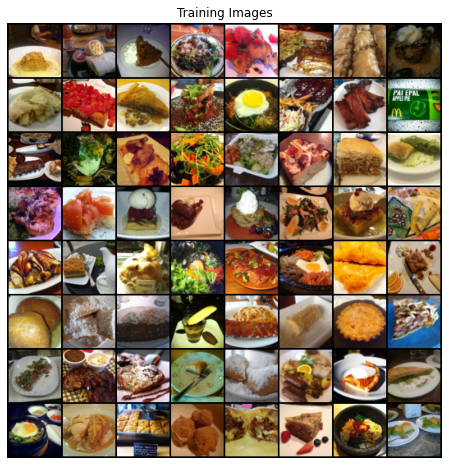

In [25]:
import torchvision.utils as vutils
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [36]:
class Generator(nn.Module):
    def __init__(self, hidden_dim, noise_dim, img_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(noise_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(inplace=True),
            
            nn.Linear(hidden_dim, hidden_dim*2),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(inplace=True),
            
            nn.Linear(hidden_dim*2, hidden_dim*4),
            nn.BatchNorm1d(hidden_dim*4),
            nn.ReLU(inplace=True),
            
            nn.Linear(hidden_dim*4, img_dim),
            nn.Sigmoid()
            
        )
        
    def forward(self, noise):
         return gen(noise)
        
    

In [52]:
class Discriminator(nn.Module):
    def __init__(self, img_dim, hidden_dim, slope):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            
            nn.Linear(img_dim, hidden_dim*16),
            nn.BatchNorm1d(hidden_dim*16),
            nn.LeakyReLU(slope),
            
            nn.Linear(hidden_dim*16, hidden_dim*8),
            nn.BatchNorm1d(hidden_dim*8),
            nn.LeakyReLU(slope),
            
            nn.Linear(hidden_dim*8, hidden_dim*4),
            nn.BatchNorm1d(hidden_dim*4),
            nn.LeakyReLU(slope),
            
            nn.Linear(hidden_dim*4, 1),
        )
    def forward(self, image):
        return self.disc(image)

In [53]:
def get_noise(n_samples, noise_dim, device='cpu'):
    noise = torch.randn(n_samples, noise_dim, device=device)
    return noise

In [54]:
noise_dim = (128, 100)

In [55]:


# Set your parameters
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001



In [59]:
gen = Generator(hidden_dim = 128, noise_dim = z_dim, img_dim = image_size).to(device=device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)

disc = Discriminator(img_dim = image_size, hidden_dim = 128, slope = 0.2)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [57]:
image_size

64

In [60]:
## DEFINING DISCRIMINATOR AND GENERATOR LOSS

In [62]:
def get_disc_loss(gen, disc, criterion, real_images, num_images, z_dim, device):
    '''
    gen = generator
    disc = discriminator
    criterion = loss function
    real_images = batch of real images
    num_images = number of image the generator is supposed to generate
    z_dim = noise dimension
    device = cuda or cpu
    '''
    noise_vecs = get_noise(num_images, z_dim, device = device)
    fake_images = gen(noise_vecs)
    
    real_pred = disc(real_images)
    fake_pred = disc(fake_images.deatch())
    
    loss_real = criterion(real_pred, torch.ones_like(real_pred))
    loss_fake = criterion(fake_pred, torch.zeros_like(fake_pred))
    
    disc_loss = (loss_real + loss_fake) /2
    return disc_loss

In [65]:
def get_gen_loss(gen, disc, criterion, real_images, num_images, z_dim, device):
    '''
    gen = generator
    disc = discriminator
    criterion = loss function
    real_images = batch of real images
    num_images = number of image the generator is supposed to generate
    z_dim = noise dimension
    device = cuda or cpu
    '''
    noise_vecs = get_noise(num_images, z_dim, device=device)
    fake_images = gen(noise_vecs)
    
    fake_pred = disc(fake_images)
    gen_loss = criterion(noise, torch.ones_like(fake_pred))
    
    return gen_loss
    
    
    

In [69]:
from tqdm import tqdm
for i in tqdm(range(1000000000)):
    ...

100%|██████████| 1000000000/1000000000 [02:18<00:00, 7241881.86it/s]


In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True # Whether the generator should be tested
gen_loss = False
error = False
n_epochs = 100

for epoch in range(n_epochs):
    
    for real,_ in tqdm(dataloader):
        
        curr_batch_size = len(real)
        
        # Flattening the batch 
        real = real.view(curr_batch_size, -1).to(device)
        
        ##### UPDATE DISCRIMINATOR ######
        disc_opt.zero_grad()
        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)
        
    

In [4]:
def gen_block(input_dim, output_dim):
    '''This function will give a combined layer consisting of 
    1) Linear layer.
    2) Batch Regularization
    3) Relu'''
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True),
    )

In [7]:
class Generator:
    '''This block defines the generator, which uses the gen_block function to declare layers'''
    def __init__(self, img_dim, hidden_dim, z_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            gen_block(z_dim, hidden_dim),
            gen_block(hidden_dim, hidden_dim*4),
            gen_block(hidden_dim*4, hidden_dim*8),
            gen_block(hidden_dim*8, hidden_dim*16),
            gen_block(hidden_dim*16, img_dim),
            nn.Sigmoid()
        )
    def forward(self, noise):
        return gen(noise)

In [9]:
def disc_block(input_dim, output_dim, slope):
    '''This function will give a combined layer consisting of
    1) Linear layer
    2) Leaky Relu'''
    
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.LeakyReLU(slope),
    )

In [ ]:
class Discriminator:
    '''This block defines the discriminator, which uses the disc_block function to declare layers'''
    def __init__(self, img_dim, hidden_dim, z_dim):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            disc_block(img_dim, hidden_dim*16),
            disc_block()
        )